# Neighboring blocks constrained by overlap

In [1]:
import numpy as np
import matplotlib.pyplot as plt

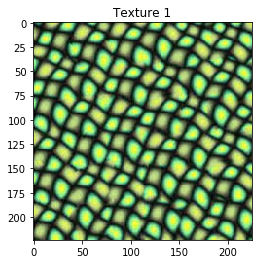

In [14]:
texture_1 = plt.imread('../data/texture1.jpg')

plt.title('Texture 1')
plt.imshow(texture_1)
plt.axis('off')
plt.show()

In [3]:
h, w, c = texture_1.shape

block_size = 75

assert block_size < min(h, w)

h, w, c

(224, 225, 3)

In [4]:
y_max, x_max = h - block_size, w - block_size
y_max, x_max

(149, 150)

In [5]:
# desired size of new image is twice original one
dh = h * 2
dw = w * 2

nx_blocks = ny_blocks = max(dh, dw) // block_size
w_new = h_new = nx_blocks * block_size
print('New image will be %d x %d x %d, composed of %d x %d blocks' % (w_new, h_new, c, nx_blocks, ny_blocks))

New image will be 450 x 450 x 3, composed of 6 x 6 blocks


In [6]:
n_blocks = nx_blocks * ny_blocks
n_blocks

36

## Place Blocks
Search for a block in set of all possible blocks that by some measure agrees with its neighbor along the region of overlap.

Define this distance to be adjacent pixels' RGB l2 norm

In [63]:
xs = np.arange(x_max)
ys = np.arange(y_max)
all_blocks = np.array([texture_1[y:y + block_size, x:x + block_size] for x in xs for y in ys])
all_blocks.shape

(22350, 75, 75, 3)

In [218]:
# pad with block_size zeros
texture_img = np.zeros((h_new + 2*block_size, w_new + 2*block_size, c), dtype=texture_1.dtype)

In [219]:
# place block
# neighborhood size
n_rc = 10
for y in range(ny_blocks):
    for x in range(nx_blocks):
        x1, y1 = x * block_size + block_size, y * block_size + block_size
        x2, y2 = x1 + block_size, y1 + block_size

        # search for block in all_blocks that minimized the cost
        top_cost = np.sum((all_blocks[:, :n_rc, :, :] - texture_img[y1 - n_rc:y1, x1:x2]) ** 2, axis=(1,2,3))
        left_cost = np.sum((all_blocks[:, :, :n_rc, :] - texture_img[y1:y2, x1 - n_rc:x1]) ** 2, axis=(1,2,3))

        total_cost = top_cost + left_cost

        min_block = all_blocks[np.argmin(total_cost)]
        texture_img[y1:y2, x1:x2] = min_block

In [220]:
# get rid of padding
texture_img = texture_img[block_size:h_new + block_size, block_size:w_new + block_size]

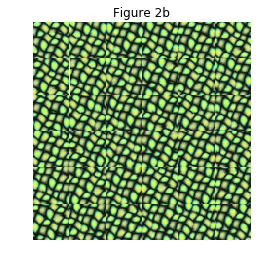

In [221]:
plt.title('Figure 2b')
plt.imshow(texture_img)
plt.axis('off')
plt.show()